# Installing tensorflow library

In [11]:
!pip install tensorflow

# Importing necessary libraries

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Fetching Train data from google drive to use for training and testing.

In [13]:

# loading data from folder
train_data_dir = './archive/seg_train/seg_train'
test_data_dir = './archive/seg_test/seg_test'

# Data Exploration

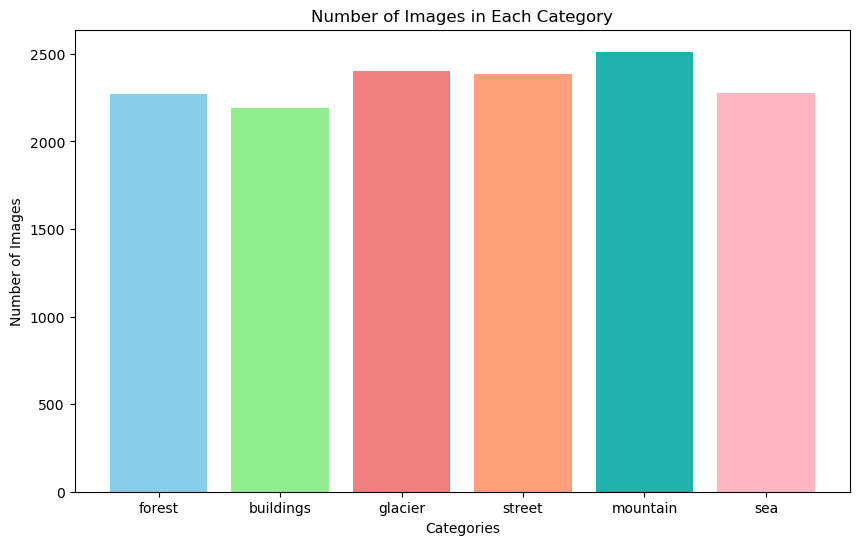

In [14]:

categories = os.listdir(train_data_dir)
category_count = {}


colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen', 'lightpink']

for i, category in enumerate(categories):
    category_path = os.path.join(train_data_dir, category)
    category_count[category] = len(os.listdir(category_path))

plt.figure(figsize=(10, 6))
plt.bar(category_count.keys(), category_count.values(), color=colors)
plt.title('Number of Images in Each Category')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.show()

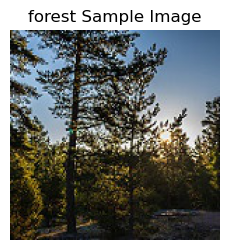

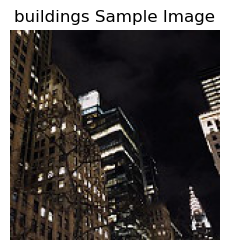

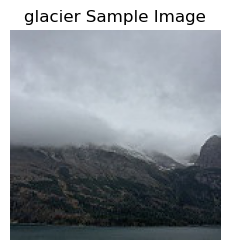

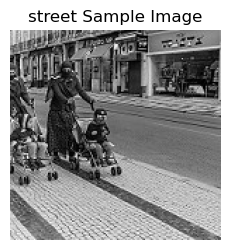

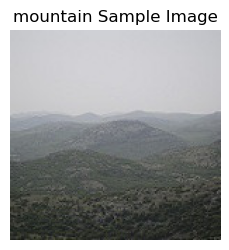

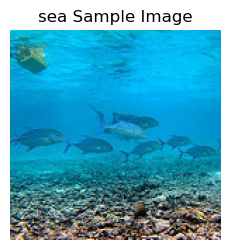

In [5]:


categories = os.listdir(train_data_dir)
category_count = {}


for i, category in enumerate(categories):
    category_path = os.path.join(train_data_dir, category)
    category_count[category] = len(os.listdir(category_path))


    sample_image_path = os.path.join(category_path, os.listdir(category_path)[0])
    sample_image = load_img(sample_image_path, target_size=(150, 150))
    sample_image_array = img_to_array(sample_image) / 255.0

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 3, i+1)
    plt.imshow(sample_image_array)
    plt.title(f'{category} Sample Image')
    plt.axis('off')

plt.show()




# Hyper parameters and Image size setting

In [15]:
batch_size = 16
image_size = (150, 150)

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=image_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# CNN model

In [18]:

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Model training and evaluation

In [20]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_generator, epochs=15, validation_data=test_generator)


test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


Epoch 1/15
878/878 [==============================] - 94s 107ms/step - loss: 0.7792 - accuracy: 0.7121 - val_loss: 0.6474 - val_accuracy: 0.7523
Epoch 2/15
878/878 [==============================] - 94s 107ms/step - loss: 0.6039 - accuracy: 0.7823 - val_loss: 0.5993 - val_accuracy: 0.7917
Epoch 3/15
878/878 [==============================] - 94s 107ms/step - loss: 0.5151 - accuracy: 0.8172 - val_loss: 0.5236 - val_accuracy: 0.8090
Epoch 4/15
878/878 [==============================] - 96s 109ms/step - loss: 0.4512 - accuracy: 0.8385 - val_loss: 0.4644 - val_accuracy: 0.8357
Epoch 5/15
878/878 [==============================] - 95s 108ms/step - loss: 0.4216 - accuracy: 0.8489 - val_loss: 0.4728 - val_accuracy: 0.8277
Epoch 6/15
878/878 [==============================] - 96s 110ms/step - loss: 0.3855 - accuracy: 0.8652 - val_loss: 0.4341 - val_accuracy: 0.8523
Epoch 7/15
878/878 [==============================] - 95s 108ms/step - loss: 0.3671 - accuracy: 0.8705 - val_loss: 0.4471 - val_ac

In [11]:
model.save('cnn_modelV.h5')

/Users/macpro/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


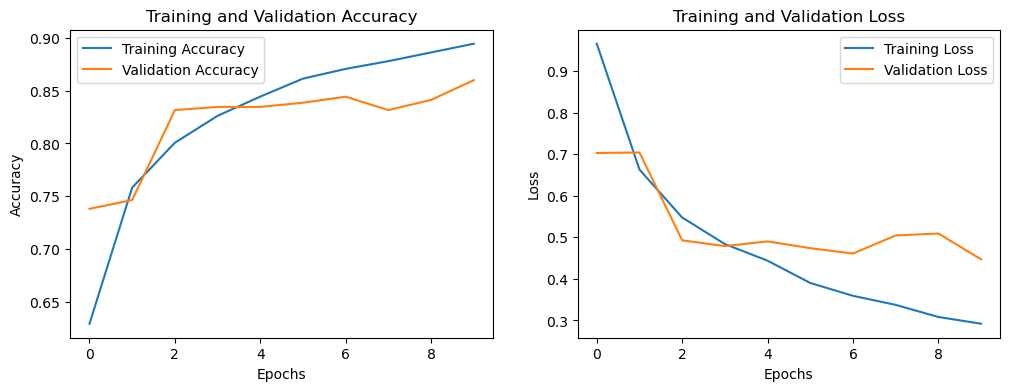

In [12]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Model testing

Enter the path of the image you want to classify: ./archive/seg_pred/seg_pred/536.jpg
1/1 [==============================] - 0s 48ms/step


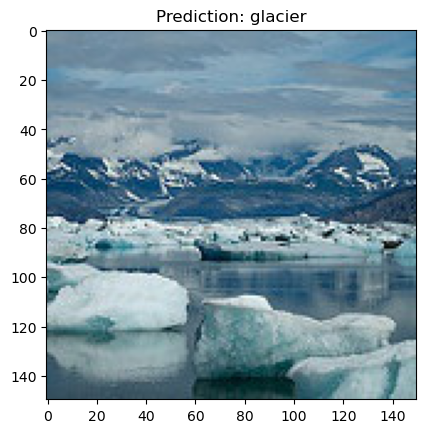

In [18]:
from tensorflow.keras.models import load_model

from tensorflow.keras.preprocessing import image
model = load_model('cnn_model.h5')


def classify_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = categories[np.argmax(prediction)]

    plt.imshow(img)
    plt.title(f'Prediction: {predicted_class}')
    plt.show()


user_image_path = input("Enter the path of the image you want to classify: ")
classify_image(user_image_path)